In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../evaluation_results/runtime/runtime_log.txt", delimiter="; ")

/tmp/ipykernel_403107/1829807877.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../evaluation_results/runtime/runtime_log.txt", delimiter="; ")


In [3]:
df.sort_values(["k", "n_obs", "n_var"])

,k,n_obs,n_var,t[s] PCA,t[s] NX,t[s] GT
6,2,100,100,123.639569,0.179527,0.025168
9,2,100,1000,133.533449,0.056058,0.005782
1,2,100,2000,103.652004,0.073584,0.005967
8,2,100,5000,130.409637,0.021076,0.005581
3,2,1000,100,65.918887,29.595613,15.812293
15,2,1000,1000,289.512147,9.650097,2.676020
17,2,1000,2000,297.634729,5.471175,3.198448
18,2,1000,5000,300.865964,7.649877,5.530088
25,2,5000,100,278.371368,90.903676,171.022708
26,2,5000,1000,256.983392,103.192655,182.998925


In [4]:
df_melted = df.melt(id_vars=["k", "n_var", "n_obs"], 
                    value_vars=["t[s] PCA", "t[s] NX", "t[s] GT"],
                    var_name="Component", value_name="Runtime")

In [5]:
df_melted

,k,n_var,n_obs,Component,Runtime
0,5,100,100,t[s] PCA,87.263817
1,2,2000,100,t[s] PCA,103.652004
2,5,2000,100,t[s] PCA,111.051494
3,2,100,1000,t[s] PCA,65.918887
4,10,2000,100,t[s] PCA,111.419392
...,...,...,...,...,...
100,5,2000,5000,t[s] GT,0.000000
101,5,1000,5000,t[s] GT,0.000000
102,5,5000,5000,t[s] GT,0.000000
103,10,100,5000,t[s] GT,0.000000


In [6]:
df_melted

,k,n_var,n_obs,Component,Runtime
0,5,100,100,t[s] PCA,87.263817
1,2,2000,100,t[s] PCA,103.652004
2,5,2000,100,t[s] PCA,111.051494
3,2,100,1000,t[s] PCA,65.918887
4,10,2000,100,t[s] PCA,111.419392
...,...,...,...,...,...
100,5,2000,5000,t[s] GT,0.000000
101,5,1000,5000,t[s] GT,0.000000
102,5,5000,5000,t[s] GT,0.000000
103,10,100,5000,t[s] GT,0.000000


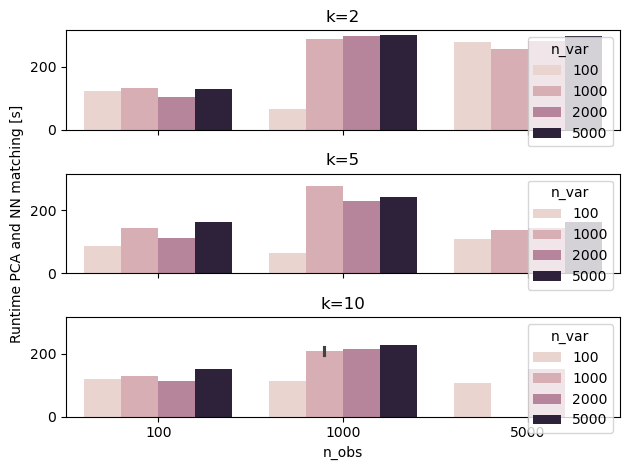

In [7]:
ks = np.unique(df["k"])
f, axs = plt.subplots(len(ks), 1, sharex=True, sharey=True)
for i, k in enumerate(ks):
    sns.barplot(df_melted[(df_melted["Component"] == "t[s] PCA") & (df_melted["k"] == k)], hue="n_var", y="Runtime", x="n_obs", hue_order=[100, 1000], ax=axs[i])
    axs[i].set_title(f"k={k}")
    if i == len(ks) // 2:
        axs[i].set_ylabel("Runtime PCA and NN matching [s]")
    else:
        axs[i].set_ylabel(None)

plt.tight_layout()

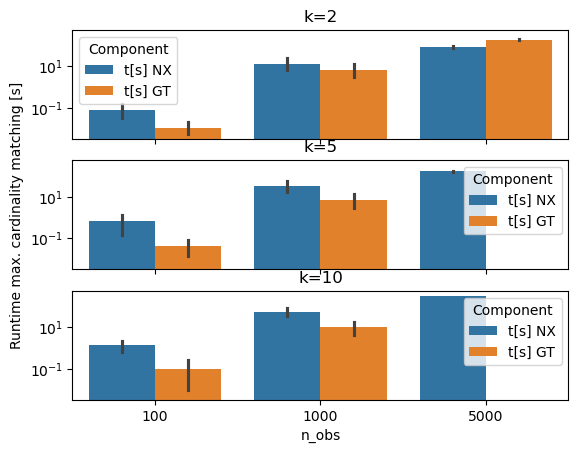

In [8]:
ks = np.unique(df["k"])
f, axs = plt.subplots(len(ks), 1, sharex=True, sharey=True)
for i, k in enumerate(ks):
    sns.barplot(df_melted[(df_melted["Component"] != "t[s] PCA") & (df_melted["k"] == k)], hue="Component", y="Runtime", x="n_obs", ax=axs[i]) #TODO when len(k) > 1
    axs[i].set_title(f"k={k}")
    if i == len(ks) // 2:
        axs[i].set_ylabel("Runtime max. cardinality matching [s]")
    else:
        axs[i].set_ylabel(None)

plt.yscale("log")